## The Spark Foundation

### Author - Gayatri Bhujade

#### Task 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### 1. Read and visualise the data

In [1]:
#Import library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import matplotlib.image as mpimg

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Read the given dataset, and view some sample records

iris_df = pd.read_csv(r"C:\Users\Gayatri\Desktop\UpGrad\Spark Foundation\Iris Cluster\Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#It is used to view some basic statistical details like percentile, mean, std etc.

iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# IT is used to get a detail summary of the dataframe

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#The shape property returns a tuple representing the dimensionality of the DataFrame

iris_df.shape

(150, 6)

In [6]:
#check Null values

iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Prepare the data for modelling

#### Checking Outliers

<AxesSubplot:ylabel='SepalLengthCm'>

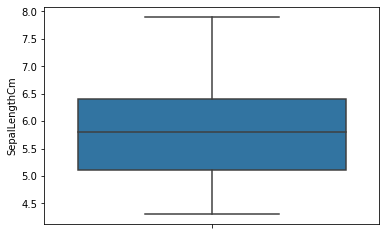

In [7]:
import seaborn as sns

sns.boxplot(y='SepalLengthCm', data=iris_df)

<AxesSubplot:ylabel='SepalWidthCm'>

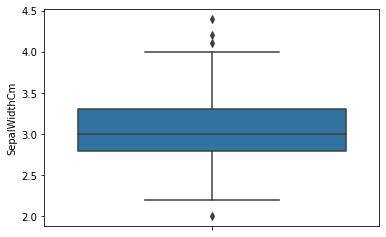

In [8]:
sns.boxplot(y='SepalWidthCm', data=iris_df)

<AxesSubplot:ylabel='PetalLengthCm'>

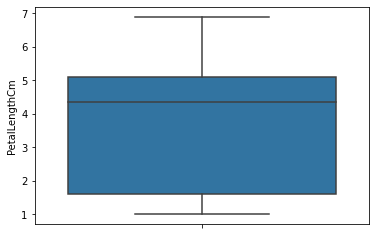

In [9]:
sns.boxplot(y='PetalLengthCm', data=iris_df)

<AxesSubplot:ylabel='PetalWidthCm'>

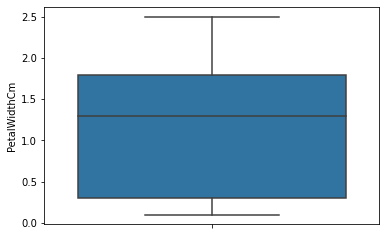

In [10]:
sns.boxplot(y='PetalWidthCm', data=iris_df)

From above observation there is no outliers but there is an outlier in 'SepalWidthCm' column

We will use IQR method where interquartile range (IQR) is the range of values that resides in the middle of the scores. When a distribution is skewed, and the median is used instead of the mean to show a central tendency, the appropriate measure of variability is the Interquartile range.

In [11]:
# outlier treatment for 'SepalWidthCm'

Q1 = iris_df['SepalWidthCm'].quantile(0.25)
Q3 = iris_df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1
iris_df = iris_df[(iris_df['SepalWidthCm'] >= Q1 - 1.5*IQR) & (iris_df['SepalWidthCm'] <= Q3 + 1.5*IQR)]

In [12]:
iris_df.shape

(146, 6)

<AxesSubplot:ylabel='SepalWidthCm'>

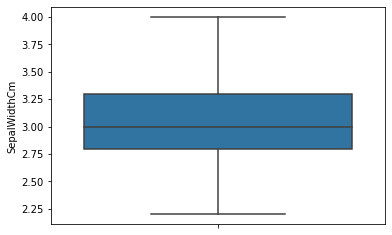

In [13]:
sns.boxplot(y='SepalWidthCm', data=iris_df)

#### Scaling

Feature Scaling is a pre-processing step. It is a technique used to normalize the range of independent variables or features of data.

In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler
# rescaling
df = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(146, 4)

In [15]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_scaled.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


### Modelling

#### Finding the Optimal Number of Clusters¶

#### 1. elbow-curve

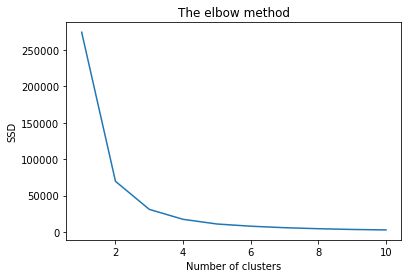

In [16]:
# Finding the optimum number of clusters for k-means classification
# elbow-curve/SSD
x = iris_df.iloc[:, [0, 1, 2, 3]].values

ssd = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

plt.plot(range(1, 11), ssd)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD') # Within cluster sum of squares
plt.show()

From above observation you can clearly see we used 'The elbow method' graph, the optimum clusters is where the elbow occurs. 

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

#### 2. Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

S.A. is a way to measure how close each point in a cluster is to the points in its neighboring clusters. Its a neat way to find out the optimum value for k during k-means clustering. we can easily choose high score and number of k via silhouette analysis technique instead of elbow technique

In [22]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5802862813877144
For n_clusters=3, the silhouette score is 0.46634515335503746
For n_clusters=4, the silhouette score is 0.41810445473527097
For n_clusters=5, the silhouette score is 0.3536366844284736
For n_clusters=6, the silhouette score is 0.3434385166598303
For n_clusters=7, the silhouette score is 0.36318765536034814
For n_clusters=8, the silhouette score is 0.36615827809451956


In [18]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# assign the label
iris_df['cluster_id'] = kmeans.labels_
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


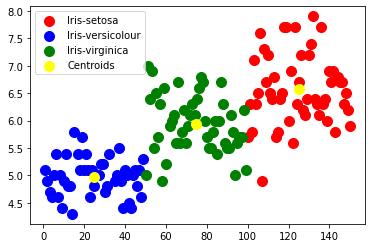

In [21]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#### Conclusion :

An insight we can get from the scatterplot is the model’s accuracy in determining Setosa and Virginica is comparatively more to Versicolour. Also, learned about unsupervised learning implemented the K-means clustering algorithm.